<a href="https://colab.research.google.com/github/r-hopper/hema/blob/main/Pike_Rapier_Thrust_Data_Processing_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pike Rapier Thrust Data Processing + Analysis

In [111]:
# Load libraries and packages

import numpy as np
from numpy import r_
import pandas as pd
import math
import matplotlib.pyplot as plt
import bokeh
import seaborn as sns
plt.style.use('ggplot')
#from google.colab import drive
#drive.mount('/content/drive')

In [57]:
# Upload pike_rapier_thrust_data.csv into the Colab environment to run
# Data lives here: https://drive.google.com/file/d/18cCWze3-OHmb1WxvRdKWJ1i17G-HzSHF/view?usp=sharing
df = pd.read_csv('/content/pike_rapier_thrust_data.csv')
df.head()

,sampling_instance,sampling_in_seconds,tip_rubber_1_1_x,tip_rubber_1_1_y,tip_rubber_1_1_z,tip_rubber_1_2_x,tip_rubber_1_2_y,tip_rubber_1_2_z,tip_rubber_1_3_x,tip_rubber_1_3_y,...,tip_swelled_1_4_z,tip_swelled_2_2_x,tip_swelled_2_2_y,tip_swelled_2_2_z,tip_swelled_2_3_x,tip_swelled_2_3_y,tip_swelled_2_3_z,tip_swelled_2_4_x,tip_swelled_2_4_y,tip_swelled_2_4_z
0,1,0.033333,0.074890,-0.988998,-0.136337,0.062622,-0.987213,-0.155090,0.045212,-0.988831,...,-0.654587,0.269562,-0.681015,-0.724777,0.227356,-0.903976,-0.376953,-0.001801,-0.655701,-0.765762
1,2,0.066667,0.087723,-0.987564,-0.148163,0.050125,-0.988495,-0.147354,0.063721,-0.989395,...,-0.602097,0.214584,-0.715622,-0.716782,0.173203,-0.910217,-0.343414,0.023727,-0.583527,-0.804367
2,3,0.100000,0.037918,-0.990036,-0.139328,0.043442,-0.989731,-0.125687,0.080338,-0.989975,...,-0.714844,0.153091,-0.677963,-0.676071,0.192123,-0.905777,-0.357071,-0.022217,-0.711395,-0.809692
3,4,0.133333,0.099289,-0.988464,-0.136551,0.069855,-0.989563,-0.124237,0.064011,-0.989578,...,-0.735931,0.187164,-0.692230,-0.690826,0.245270,-0.900452,-0.394272,0.001816,-0.623138,-0.756134
4,5,0.166667,0.052399,-0.988846,-0.139114,0.081390,-0.986115,-0.149246,0.057373,-0.989792,...,-0.771271,0.193039,-0.684601,-0.736832,0.258072,-0.880524,-0.417923,0.015060,-0.619476,-0.767746


# Calculate force in Gs
#### |F| = sqrt(x^2 + y^2 + z^2)

In [58]:
# don't run this cell more than once or it'll make a bunch of extra columns lol

for n in range(2, len(df.columns), 3): # starting at the first measurement, find x vectors
  force = np.sqrt((df.iloc[:,n]**2) + (df.iloc[:,n+1]**2) + (df.iloc[:,n+2]**2)) # calculate |F| using x,y,z
  df[(df.columns[n]).split('_x', 1)[0] +'_force'] = force # name new column based on the x vector name

df.head()

,sampling_instance,sampling_in_seconds,tip_rubber_1_1_x,tip_rubber_1_1_y,tip_rubber_1_1_z,tip_rubber_1_2_x,tip_rubber_1_2_y,tip_rubber_1_2_z,tip_rubber_1_3_x,tip_rubber_1_3_y,...,tip_rubber_2_2_force,tip_rubber_2_3_force,tip_rubber_2_4_force,tip_swelled_1_1_force,tip_swelled_1_2_force,tip_swelled_1_3_force,tip_swelled_1_4_force,tip_swelled_2_2_force,tip_swelled_2_3_force,tip_swelled_2_4_force
0,1,0.033333,0.074890,-0.988998,-0.136337,0.062622,-0.987213,-0.155090,0.045212,-0.988831,...,1.034711,1.003709,0.993865,0.965620,0.999386,1.002255,0.965620,1.030411,1.005464,1.008136
1,2,0.066667,0.087723,-0.987564,-0.148163,0.050125,-0.988495,-0.147354,0.063721,-0.989395,...,0.984540,0.988607,1.019477,0.975053,1.002049,1.000045,0.975053,1.035344,0.988143,0.994019
2,3,0.100000,0.037918,-0.990036,-0.139328,0.043442,-0.989731,-0.125687,0.080338,-0.989975,...,1.014974,1.014332,1.006069,1.021187,1.002106,0.999674,1.021187,0.969610,0.992393,1.078043
3,4,0.133333,0.099289,-0.988464,-0.136551,0.069855,-0.989563,-0.124237,0.064011,-0.989578,...,1.005258,1.009691,0.998992,1.028051,1.001769,0.999404,1.028051,0.995717,1.013125,0.979818
4,5,0.166667,0.052399,-0.988846,-0.139114,0.081390,-0.986115,-0.149246,0.057373,-0.989792,...,1.000231,0.998486,1.003484,1.059540,1.002814,1.002270,1.059540,1.024141,1.008258,0.986616


# Calculate average jerk (m/s^3)
#### > jerk = (a_n - a_n-1) / (t_n - t_n-1)
#### > we're reading at constant 30Hz intervals so t_n-t_n-1 will always be 0.0333 seconds

##### https://physics.stackexchange.com/questions/454760/how-to-find-jerk-from-discrete-velocity-data

In [59]:
# don't run this cell more than once or it'll make a bunch of extra columns lol

for i in range(df.columns.get_loc("tip_rubber_1_1_force"),len(df.columns)): # starting at the first force column, loop through every force column to the end
  jerk = (df.iloc[:,i].diff()) / (df.loc[:,'sampling_in_seconds'].diff()) 
  df[(df.columns[i]).split('_force', 1)[0] +'_jerk'] = jerk #name new column based on the force vector name

df.head()

,sampling_instance,sampling_in_seconds,tip_rubber_1_1_x,tip_rubber_1_1_y,tip_rubber_1_1_z,tip_rubber_1_2_x,tip_rubber_1_2_y,tip_rubber_1_2_z,tip_rubber_1_3_x,tip_rubber_1_3_y,...,tip_rubber_2_2_jerk,tip_rubber_2_3_jerk,tip_rubber_2_4_jerk,tip_swelled_1_1_jerk,tip_swelled_1_2_jerk,tip_swelled_1_3_jerk,tip_swelled_1_4_jerk,tip_swelled_2_2_jerk,tip_swelled_2_3_jerk,tip_swelled_2_4_jerk
0,1,0.033333,0.074890,-0.988998,-0.136337,0.062622,-0.987213,-0.155090,0.045212,-0.988831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.066667,0.087723,-0.987564,-0.148163,0.050125,-0.988495,-0.147354,0.063721,-0.989395,...,-1.505150,-0.453070,0.768367,0.282993,0.079886,-0.066293,0.282993,0.147996,-0.519603,-0.423526
2,3,0.100000,0.037918,-0.990036,-0.139328,0.043442,-0.989731,-0.125687,0.080338,-0.989975,...,0.913019,0.771735,-0.402242,1.384012,0.001718,-0.011132,1.384012,-1.972039,0.127473,2.520744
3,4,0.133333,0.099289,-0.988464,-0.136551,0.069855,-0.989563,-0.124237,0.064011,-0.989578,...,-0.291472,-0.139222,-0.212319,0.205940,-0.010110,-0.008087,0.205940,0.783238,0.621964,-2.946769
4,5,0.166667,0.052399,-0.988846,-0.139114,0.081390,-0.986115,-0.149246,0.057373,-0.989792,...,-0.150789,-0.336146,0.134765,0.944645,0.031344,0.085967,0.944645,0.852694,-0.146013,0.203948


# Plot force by time

In [97]:
force_loc = df.columns.get_loc('tip_rubber_1_1_force') #identify where force starts
jerk_loc = df.columns.get_loc('tip_rubber_1_1_jerk') #identify where jerk starts
seconds_loc = df.columns.get_loc('sampling_in_seconds') #identify where seconds are located

force_slice = np.r_[seconds_loc, force_loc:jerk_loc] #cols for plotting force
jerk_slice = np.r_[seconds_loc, jerk_loc:len(df.columns)] #cols for plotting jerk
print(force_slice)
print(jerk_slice)



force_rubber_loc = df.columns.get_loc('tip_rubber_1_1_force') #identify where rubber force starts
jerk_rubber_loc = df.columns.get_loc('tip_rubber_1_1_jerk') #identify where rubber jerk starts
force_swelled_loc = df.columns.get_loc('tip_swelled_1_1_force') #identify where swelled force starts
jerk_swelled_loc = df.columns.get_loc('tip_swelled_1_1_jerk') #identify where swelled jerk starts

force_rubber_slice = np.r_[seconds_loc, force_rubber_loc:force_swelled_loc] #cols for plotting rubber tip force
jerk_rubber_slice = np.r_[seconds_loc, jerk_rubber_loc:jerk_swelled_loc] #cols for plotting rubber tip jerk
force_swelled_slice = np.r_[seconds_loc, force_swelled_loc:jerk_rubber_loc] #cols for plotting rubber tip force
jerk_swelled_slice = np.r_[seconds_loc, jerk_swelled_loc:len(df.columns)] #cols for plotting rubber tip jerk

print(force_rubber_slice)
print(jerk_rubber_slice)
print(force_swelled_slice)
print(jerk_swelled_slice)

[ 1 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
[ 1 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76]
[ 1 47 48 49 50 51 52 53 54]
[ 1 62 63 64 65 66 67 68 69]
[ 1 55 56 57 58 59 60 61]
[ 1 70 71 72 73 74 75 76]


Text(0, 0.5, 'Acceleration (G)')

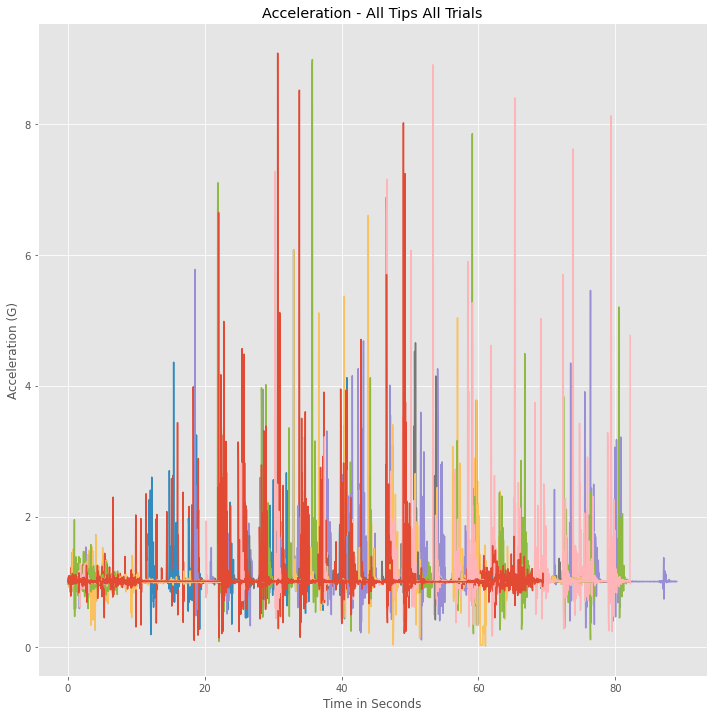

In [126]:
# Plot all acceleration data

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
axs.plot(df.iloc[:,force_slice].set_index('sampling_in_seconds'))
# Add title and axis names
plt.title('Acceleration - All Tips All Trials')
plt.xlabel('Time in Seconds')
plt.ylabel('Acceleration (G)')

Text(0, 0.5, 'Jerk (m/s^3)')

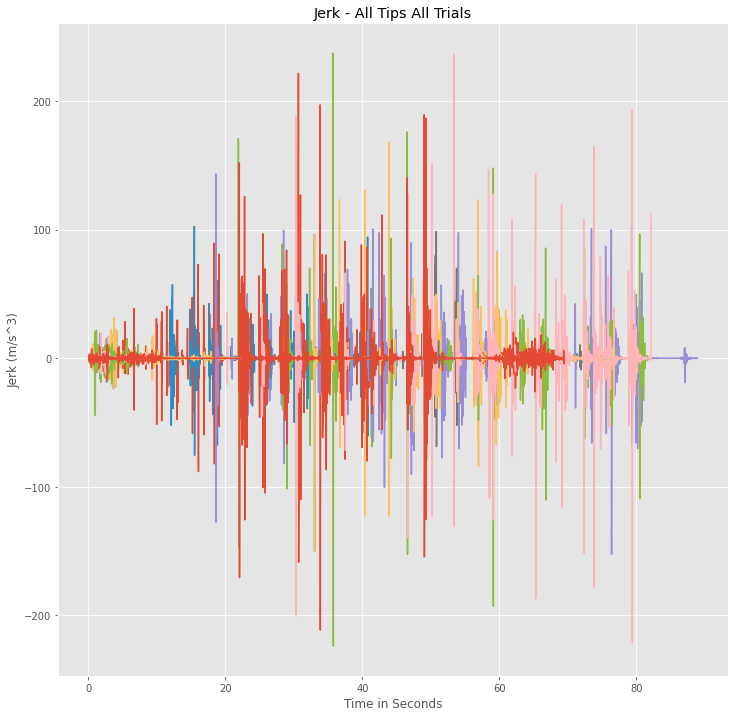

In [127]:
# Plot all jerk data

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
axs.plot(df.iloc[:,jerk_slice].set_index('sampling_in_seconds'))
# Add title and axis names
plt.title('Jerk - All Tips All Trials')
plt.xlabel('Time in Seconds')
plt.ylabel('Jerk (m/s^3)')

Text(0.5, 1.0, 'Swelled Tip - All Trials')

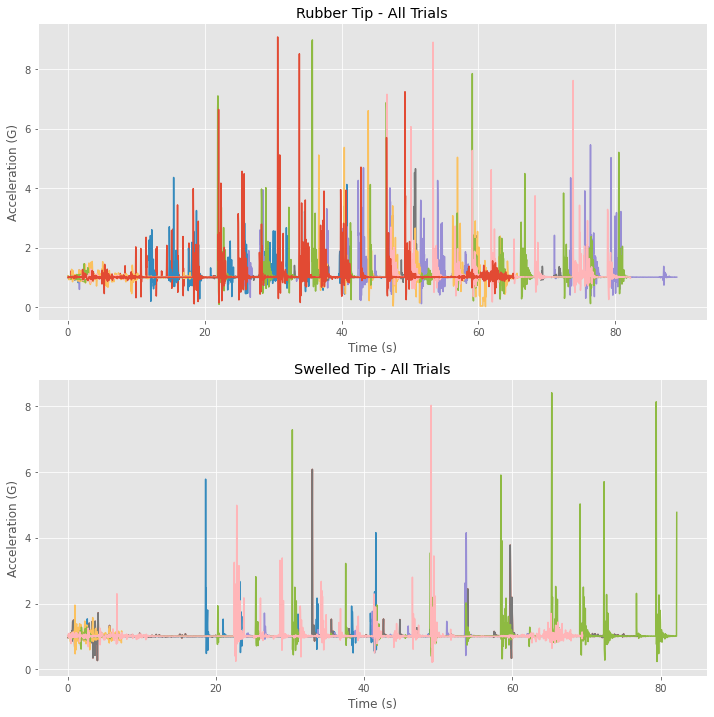

In [123]:
# Plot rubber tip acceleration data
# Plot swelled tip acceleration data

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
axs[0].plot(df.iloc[:,force_rubber_slice].set_index('sampling_in_seconds'))
axs[1].plot(df.iloc[:,force_swelled_slice].set_index('sampling_in_seconds'))

axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Acceleration (G)')
axs[0].set_title('Rubber Tip - All Trials')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Acceleration (G)')
axs[1].set_title('Swelled Tip - All Trials')

# Plot jerk by time

Text(0.5, 1.0, 'Swelled Tip - All Trials')

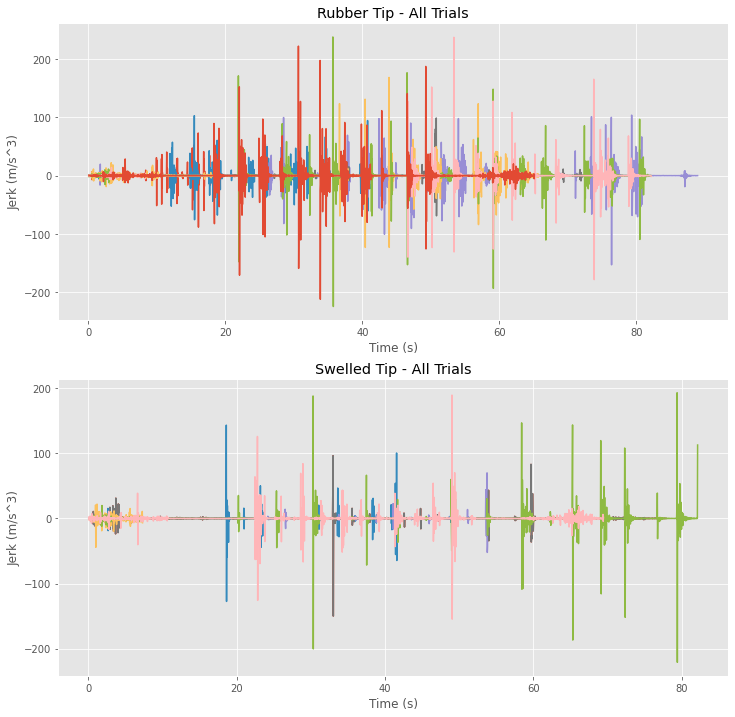

In [124]:
# Plot rubber tip jerk data
# Plot swelled tip jerk data

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
axs[0].plot(df.iloc[:,jerk_rubber_slice].set_index('sampling_in_seconds'))
axs[1].plot(df.iloc[:,jerk_swelled_slice].set_index('sampling_in_seconds'))

axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Jerk (m/s^3)')
axs[0].set_title('Rubber Tip - All Trials')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Jerk (m/s^3)')
axs[1].set_title('Swelled Tip - All Trials')

# Identify/label thrusts

In [ ]:
# @TODO
# Investigate spike sorting algorithm (github SpikeInterface)
# Investigate matrixprofile DAMP 2.0
# Try naive approach (search for diff(rows)<0 to identify peaks)

In [155]:
# don't run this cell more than once or it'll make a bunch of extra columns lol
peak_flag = []
for i in range(df.columns.get_loc("tip_rubber_1_1_force"),df.columns.get_loc("tip_rubber_1_1_jerk")): # starting at the first force column, loop through every force column to the end
  peak_flag = np.where((df.iloc[:,i].diff()) > 0, 1, 0) #if row_n_force > row_n-1_force then we can maybe assume means a thrust is in progress -- once that is no longer true we're no longer interested
  df[(df.columns[i]).split('_force', 1)[0] +'_peak_flag'] = peak_flag #name new column

df.head()

,sampling_instance,sampling_in_seconds,tip_rubber_1_1_x,tip_rubber_1_1_y,tip_rubber_1_1_z,tip_rubber_1_2_x,tip_rubber_1_2_y,tip_rubber_1_2_z,tip_rubber_1_3_x,tip_rubber_1_3_y,...,tip_rubber_2_2_peak_flag,tip_rubber_2_3_peak_flag,tip_rubber_2_4_peak_flag,tip_swelled_1_1_peak_flag,tip_swelled_1_2_peak_flag,tip_swelled_1_3_peak_flag,tip_swelled_1_4_peak_flag,tip_swelled_2_2_peak_flag,tip_swelled_2_3_peak_flag,tip_swelled_2_4_peak_flag
0,1,0.033333,0.074890,-0.988998,-0.136337,0.062622,-0.987213,-0.155090,0.045212,-0.988831,...,0,0,0,0,0,0,0,0,0,0
1,2,0.066667,0.087723,-0.987564,-0.148163,0.050125,-0.988495,-0.147354,0.063721,-0.989395,...,0,0,1,1,1,0,1,1,0,0
2,3,0.100000,0.037918,-0.990036,-0.139328,0.043442,-0.989731,-0.125687,0.080338,-0.989975,...,1,1,0,1,1,0,1,0,1,1
3,4,0.133333,0.099289,-0.988464,-0.136551,0.069855,-0.989563,-0.124237,0.064011,-0.989578,...,0,0,0,1,0,0,1,1,1,0
4,5,0.166667,0.052399,-0.988846,-0.139114,0.081390,-0.986115,-0.149246,0.057373,-0.989792,...,0,0,1,1,1,1,1,1,0,1


In [157]:
df.columns.get_loc('tip_rubber_1_1_peak_flag')

77

In [158]:
df.iloc[:,77:92].describe()

,tip_rubber_1_1_peak_flag,tip_rubber_1_2_peak_flag,tip_rubber_1_3_peak_flag,tip_rubber_1_4_peak_flag,tip_rubber_2_1_peak_flag,tip_rubber_2_2_peak_flag,tip_rubber_2_3_peak_flag,tip_rubber_2_4_peak_flag,tip_swelled_1_1_peak_flag,tip_swelled_1_2_peak_flag,tip_swelled_1_3_peak_flag,tip_swelled_1_4_peak_flag,tip_swelled_2_2_peak_flag,tip_swelled_2_3_peak_flag,tip_swelled_2_4_peak_flag
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.110000,0.242667,0.438000,0.393000,0.330333,0.412667,0.409000,0.319667,0.373667,0.252000,0.318000,0.373667,0.040000,0.414333,0.341667
std,0.312942,0.428767,0.496224,0.488498,0.470412,0.492396,0.491731,0.466425,0.483857,0.434234,0.465777,0.483857,0.195992,0.492689,0.474348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
